In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Optimization

In a Learning problem we have a Loss-Function or a Target function. Ideally our goal is to decrease the loss function to zero and to perform this task efficiently we use Optimization techniques.


So In a nutshell optimization is a minimization problem


An objective function f(x) may have a local minimum x, where f(x) is smaller at x than at the neighboring points of x. If f(x) is the smallest value that can be obtained in the entire domain of x, f(x) is a global mininum. The following figure demonstrates examples of local and global minima for the function:

\begin{align}
   f(x) = x⋅sin(-πx),  −1.0≤x≤3.0.
\end{align}


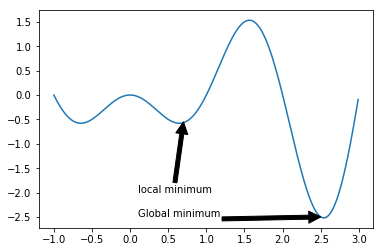

In [91]:
def f(x):
    return x * np.sin(-np.pi*x)

a = np.arange(-1,3,0.01)
plt.annotate('local minimum', xy=(0.7, -0.55), xytext=(0.1, -2.0),
            arrowprops=dict(facecolor='black'))

plt.annotate('Global minimum', xy=(2.5, -2.5), xytext=(0.1, -2.5),
            arrowprops=dict(facecolor='black'))

plt.plot(a,f(a))

Here from graph it is clear that using some optimization technique for a curve f(x) we need to find either a
    1. An optimal Local minima
    2. Global minima (Highly unlikely and difficult to find)
When an optimal minima is found at that point the loss function gives the least value means the machine learning model is converged

# Saddle Point
Saddle point is problem for an optimizer because this point is neither local minima nor local maxima.
If the figure shown below is cut through a constant x axis plane you will get a local maxima
and if it's cut through a constant y axis plane you will get a local minima


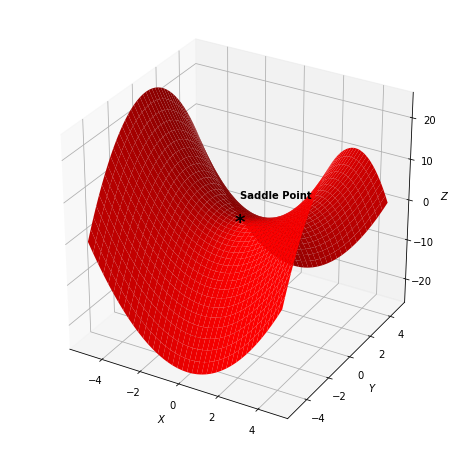

In [92]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 - Y**2

ax.text2D(0,0,'*',fontdict={'ha': 'center', 'va': 'center', 'family': 'sans-serif','fontweight': 'bold',"fontsize":20})
ax.text2D(0,0.01,'Saddle Point',fontdict={'family': 'sans-serif','fontweight': 'bold'})
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel(r'$Z$')
ax.plot_surface(X, Y, Z,color="red")

We can perform 2 types of optimization 
    1. First Order Optimization
    2. Second order Optimization
    
The approach we are going to take is named as **Gradient Descent** which is first order optimization technique, i.e we only use first derivative to calculate local minima

## Gradient Descent

Consider a loss function f(x) that takes any multi-dimensional vector 
\begin{align}
x=[x1,x2,…,xd]^⊤
\end{align}
as its input. The gradient of f(x) with respect to x is defined by the vector of partial derivatives:

\begin{align}
∇f(x)=[\frac{\partial f(x)}{\partial x1},\frac{\partial f(x)}{\partial x2} , .... \frac{\partial f(x)}{\partial xd}]^⊤.
\end{align}

In simple terms, each element of \begin{align} \frac{\partial f(x)}{\partial x1} \end{align} of the gradient indicates the rate of change for f at the point x with respect to the input xi only. To measure the rate of change of f in any direction that is represented by a unit vector u, in multivariate calculus, we define the directional derivative of f at x in the direction of u as
\begin{align}
D_uf(x)=\lim h→0  \frac{f(x+hu)−f(x)}{h},
\end{align}
which can be rewritten according to the chain rule as
\begin{align}
D_uf(x)=∇f(x)⋅u.
\end{align}

Since Duf(x)
gives the rates of change of f at the point x in all possible directions, to minimize f, we are interested in finding the direction where f can be reduced fastest. Thus, we can minimize the directional derivative Duf(x) with respect to u. Since Duf(x)=∥∇f(x)∥⋅∥u∥⋅cos(θ)=∥∇f(x)∥⋅cos(θ), where θ is the angle between ∇f(x) and u, the minimum value of cos(θ) is -1 when θ=π. Therefore, Duf(x) is minimized when u is at the opposite direction of the gradient ∇f(x). Now we can iteratively reduce the value of f

with the following gradient descent update:
        \\begin{align}
        x=x−η∇f(x),
\end{align}

where the positive scalar η
is called the learning rate or step size.

### so the algorithm is
```python
for i in range(num_epochs):
    grad = calculate_gradient(entire_data,param)
    param = param-learning_rate*grad
```

![](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*iU1QCnSTKrDjIPjSAENLuQ.png&f=1)

## Stochastic Mini-Batch Gradient Descent

The problem with gradient descent is, it loads the entire data at once and then perform the gradient update so there is a memorey constraint. To solve this problem we use something called stochastic gradient descent.

In this technique we divide the entire data into mini batches and then calculate the gradient based on that batch and update the params according to that batch
```python
for i in range(num_epochs):
    np.random.shuffle(data)
    for each_batch in random_sample_batch(data=entire_training_data,batch_size=32):
        grad = calculate_gradient(entire_batch,param)
        param = param-learning_rate*grad
```
1.Shuffle the training data set to avoid pre-existing order of examples.

2.Partition the training data set into b mini-batches based on the batch size. If the training set size is not divisible by batch size, the remaining will be its own batch.

3.The batch size is something we can tune. It is usually chosen as power of 2 such as 32, 64, 128, 256, 512, etc. The reason behind it is because some hardware such as GPUs achieve better run time with common batch sizes such as power of 
2

This technique is efficient and computationally tractable.

Other than SGD their few more different optimization alogrithms which provide an efficient and faster convergence method by updating the weights and biases
1. Nestrov Acclerated Gradient
2. Adagrad
3. Adadelta
4. RMSprop
5. Adam
6. AdaMax
7. Nadam
8. AMSGrad

![](https://cdn-images-1.medium.com/max/1600/1*SjtKOauOXFVjWRR7iCtHiA.gif)

## References

https://gluon.mxnet.io/chapter06_optimization/optimization-intro.html

http://ruder.io/optimizing-gradient-descent/index.html

https://www.khanacademy.org/math/multivariable-calculus/

https://github.com/pytorch/pytorch/tree/master/torch/optim